In [338]:
from astropy.io import fits
import numpy as np
from os.path import join
from numpy import random
density=15
logxi=1
datype="n{}_logxi_{}".format(density,logxi)
specnnum="1"
bN=5000
skip=(bN+2)*0
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12


rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5/tbb1",datype)


specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0)
if len(specE1)>2*bN:
    ite=14
else:
    ite=0

skip=(bN+2)*ite

specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
fraction1=np.loadtxt(join(rpatho,"current/fractions"))
#fionizE11=np.loadtxt(join(rpatho,"prevfullspec"),usecols=2,max_rows=bN,skiprows=bN*0+1)
depth1=np.loadtxt(join(rpatho,"current/temper"),usecols=0,max_rows=200,skiprows=0)
tempeV1=np.loadtxt(join(rpatho,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp1=tempeV1*eV/kb
htcomp1=np.loadtxt(join(rpatho,"current/partht"),usecols=0)
clcomp1=np.loadtxt(join(rpatho,"current/partht"),usecols=1)
htfreef1=np.loadtxt(join(rpatho,"current/partht"),usecols=2)
clfreef1=np.loadtxt(join(rpatho,"current/partht"),usecols=3)
#clrec1=np.loadtxt(join(rpatho,"current/partht"),usecols=4)
#cllines1=np.loadtxt(join(rpatho,"current/partht"),usecols=4)
cooling1=np.loadtxt(join(rpatho,"current/cooling"))
heating1=np.loadtxt(join(rpatho,"current/heating"))


specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)
if len(specE2)>2*bN:
    ite=14
else:
    ite=0

skip=(bN+2)*ite

specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE2=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE2=np.loadtxt(join(rpath,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
fraction2=np.loadtxt(join(rpath,"current/fractions"))
depth2=np.loadtxt(join(rpath,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
tempeV2=np.loadtxt(join(rpath,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp2=tempeV2*eV/kb
htcomp2=np.loadtxt(join(rpath,"current/partht"),usecols=0)
clcomp2=np.loadtxt(join(rpath,"current/partht"),usecols=1)
htfreef2=np.loadtxt(join(rpath,"current/partht"),usecols=2)
clfreef2=np.loadtxt(join(rpath,"current/partht"),usecols=3)
cooling2=np.loadtxt(join(rpath,"current/cooling"))
heating2=np.loadtxt(join(rpath,"current/heating"))

#with warnings.catch_warnings():
    #warnings.filterwarnings('ignore', r'will not be counted towards `max_rows=')

#fionizE22=np.loadtxt(join(rpath,"prevfullspec"),usecols=2,max_rows=bN,skiprows=bN*0+1)
#fionizE22in=np.loadtxt(join(rpath,"current/fioniz_in2"),usecols=1,max_rows=bN,skiprows=0)
#rpath82=join("/disk/bifrost/yuanze/xillver_res/ktbb1_no82",datype)
#specE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=0,max_rows=bN,skiprows=skip)
#foutE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=1,max_rows=bN,skiprows=skip)
#fionizE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=5,max_rows=bN,skiprows=skip)



rxinput=np.loadtxt("/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v1_spec%s_output.dat"%specnnum).T
rxinput2=np.loadtxt("/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v1_spec5_output.dat").T



#fspecE=np.loadtxt(join(rpath,"fullspec"),usecols=1,max_rows=500,skiprows=1)
#fIout=np.loadtxt(join(rpath,"fullspec"),usecols=2,max_rows=500,skiprows=1)

In [320]:
#Let's get the ion fractions: reading ion fractions now
import bisect
import matplotlib.pyplot as plt


feselected=[ 'Fe_%d'%n for n in range(1,26)]
oselected=['O_%d'%n for n in range(1,8)]
elements=['H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn']
noa=[n*(n+1)/2 for n in range(1,31)]
linetab=[]

spect=[]
specto=[]
linedic={}
linedico={}
for layer in range(1,201):

    fractiono=fraction1[layer-1]
    fraction=fraction2[layer-1]
    for ind in range(len(fraction)):
        k=bisect.bisect_left(noa,ind+1)
        #print("k",k)
        #print("ind",ind)
        #print(noa[k])
        #print(k)
        if k == 0:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1))
            #print(linetab[-1])
            linedic[elements[k]+"_%d"%(ind+1)]=fraction[ind]
            linedico[elements[k]+"_%d"%(ind+1)]=fractiono[ind]
        else:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1-noa[k-1]))
            linedic[elements[k]+"_%d"%(ind+1-noa[k-1])]=fraction[ind]
            linedico[elements[k]+"_%d"%(ind+1-noa[k-1])]=fractiono[ind]
    spect.append(linedic.copy())
    specto.append(linedico.copy())

#for eind,e in enumerate(feselected):
#    axs[0].plot(depth1[layer-1],linedic[e],color="C%d"%eind)
#    axs[1].plot(depth2[layer-1],linedico[e],color="C%d"%eind)

#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#axs[1].set_xscale('log')
#axs[1].set_xlabel(r"$\epsilon F_{\epsilon}$")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])


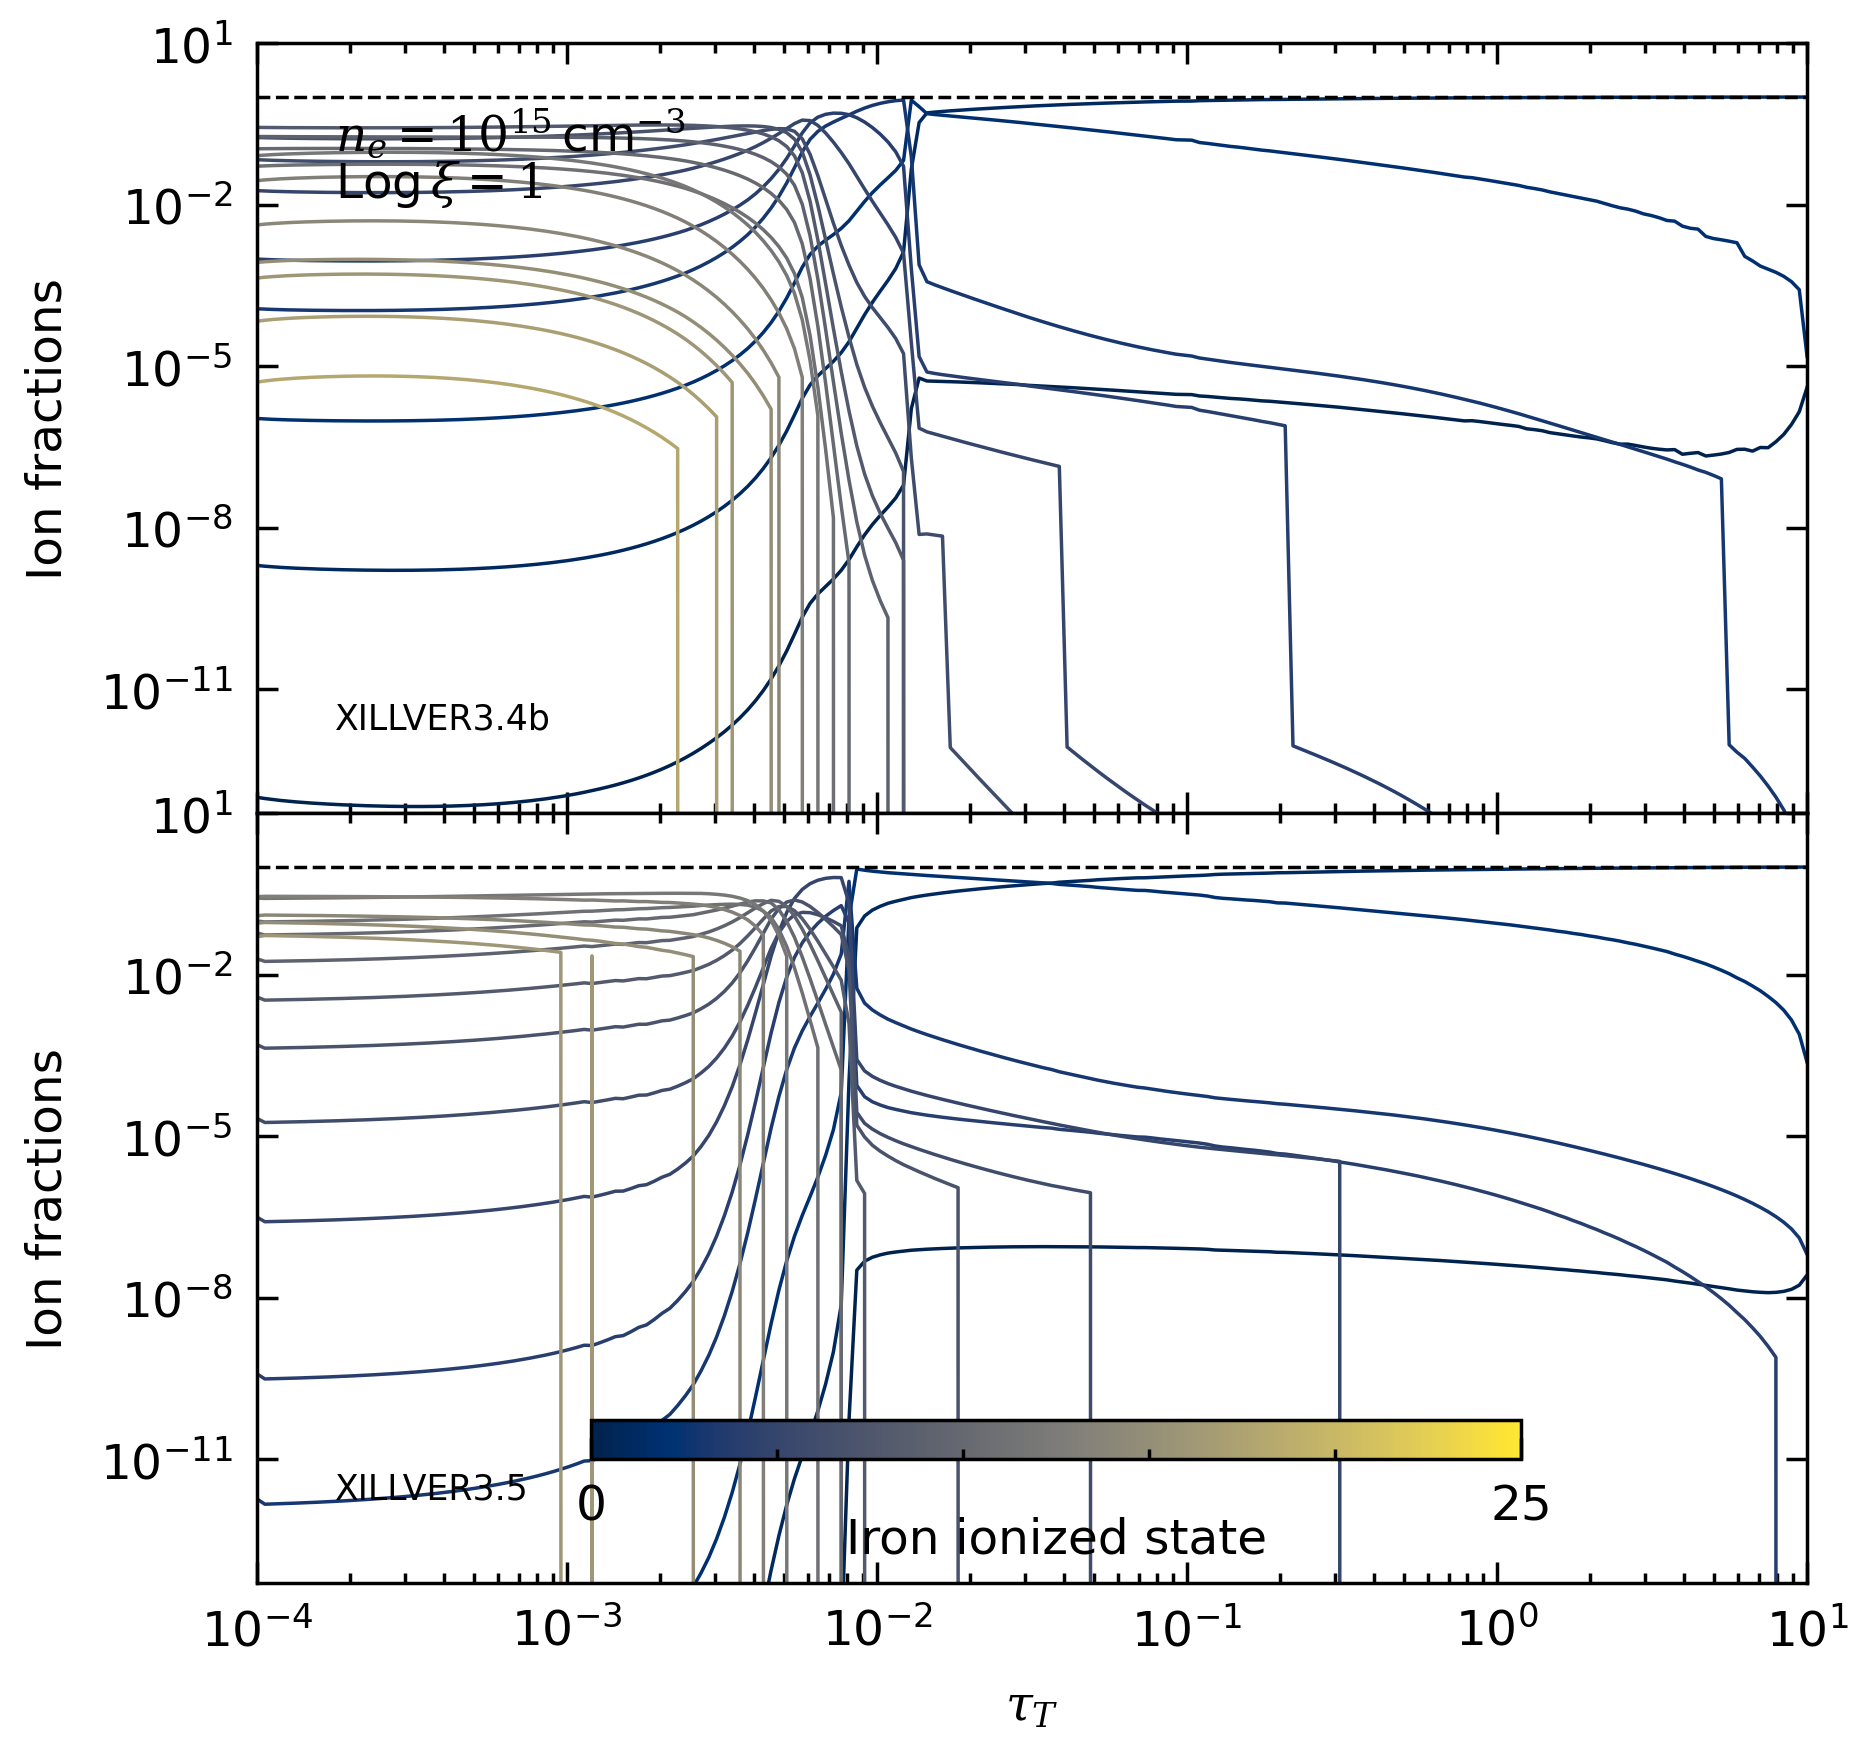

In [298]:
#Plotting Oxygen and Iron ion fractions
numrow=2
numcol=1
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
ms=0.5
sm = plt.cm.ScalarMappable(cmap=cmap)
element="Iron"
ionselect=feselected
nion=len(ionselect)

colors=matplotlib.cm.cividis(np.arange(nion)/nion)

for eind,e in enumerate(ionselect):
        
    y1=np.array([data[e] for data in specto])
    y2=np.array([data[e] for data in spect])

    axdict1[e]=axs[0].plot(depth1,y1,color=colors[eind],lw=lw)
    gion.append(e)

    axdict2[e]=axs[1].plot(depth2,y2,color=colors[eind],lw=lw)

axins1 = inset_axes(axs[1],
                    width="60%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower left',
                    bbox_to_anchor=(0.2,0.13,1,1),
                    bbox_transform=axs[1].transAxes)
cbar=plt.colorbar(sm, ticks=np.linspace(0,1,2),orientation="horizontal",cax=axins1)
cbar.set_label(label=r"{} ionized state".format(element), labelpad=-2)
cbar.ax.set_xticklabels(['0','%d'%nion])
axs[0].axhline(y=1,ls="--",lw=0.5,color='k')
axs[1].axhline(y=1,ls="--",lw=0.5,color='k')
axs[0].text(0.05,0.86,r"$n_{e}=10^{%d}\,$cm$^{-3}$"%density,transform=axs[0].transAxes)
axs[0].text(0.05,0.8,r"Log$\,\xi=%d $"%logxi,transform=axs[0].transAxes)
axs[0].text(0.05, 0.1,"XILLVER3.4b",transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"XILLVER3.5",transform=axs[1].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[0].set_ylim([5e-14,10])
axs[1].set_ylim([5e-14,10])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"$\tau_{T}$")
axs[0].set_ylabel("Ion fractions")
axs[1].set_ylabel("Ion fractions")

#axs[1].legend([axdict1[e] for e in feselected],labels=feselected,fontsize=5)
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
fig.savefig("./pub/{}state_n{}_logxi_{}.pdf".format(element,density,logxi))
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

In [339]:
#Reading heating and cooling rates
import bisect
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


cmap = matplotlib.cm.get_cmap('cividis')

feselected=[ 'Fe_%d'%n for n in range(1,26)]

elements=['H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn']
noa=[n*(n+1)/2 for n in range(1,31)]
linetab=[]

heat=[]
heato=[]
heatosum=[]
cool=[]
coolo=[]
linedic={}
linedicosum={}
linedico={}
linec={}
lineco={}
for layer in range(1,201):

    heatingo=heating1[layer-1]
    heating=heating2[layer-1]
    coolingo=cooling1[layer-1]
    cooling=cooling2[layer-1]
    for ind in range(len(heating)):
        k=bisect.bisect_left(noa,ind+1)
        #print("k",k)
        #print("ind",ind)
        #print(noa[k])
        #print(k)
        if k == 0:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1))
            #print(linetab[-1])
            #linedic[elements[k]+"_%d"%(ind+1)]=heating[ind]
            linedico[elements[k]+"_%d"%(ind+1)]=heatingo[ind]
        else:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1-noa[k-1]))
            #linedic[elements[k]+"_%d"%(ind+1-noa[k-1])]=heating[ind]
            linedico[elements[k]+"_%d"%(ind+1-noa[k-1])]=heatingo[ind]
        if elements[k] in linedicosum.keys():
            linedicosum[elements[k]]+=np.float64(heatingo[ind])
            lineco[elements[k]]+=np.float64(coolingo[ind])
        else:
            linedicosum[elements[k]]=np.float64(heatingo[ind])
            lineco[elements[k]]=np.float64(coolingo[ind])
        
    for ind in range(len(elements)):
        linedic[elements[ind]]=heating[ind]
        linec[elements[ind]]=cooling[ind]
    heat.append(linedic.copy())
    heato.append(linedico.copy())
    heatosum.append(linedicosum.copy())
    cool.append(linec.copy())
    coolo.append(lineco.copy())

#for eind,e in enumerate(feselected):
#    axs[0].plot(depth1[layer-1],linedic[e],color="C%d"%eind)
#    axs[1].plot(depth2[layer-1],linedico[e],color="C%d"%eind)

#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#axs[1].set_xscale('log')
#axs[1].set_xlabel(r"$\epsilon F_{\epsilon}$")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

/tmp/ipykernel_3416473/687539840.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axs[1].legend([axdict1[e] for e in gion],ncols=4,labels=gion,fontsize=5,\


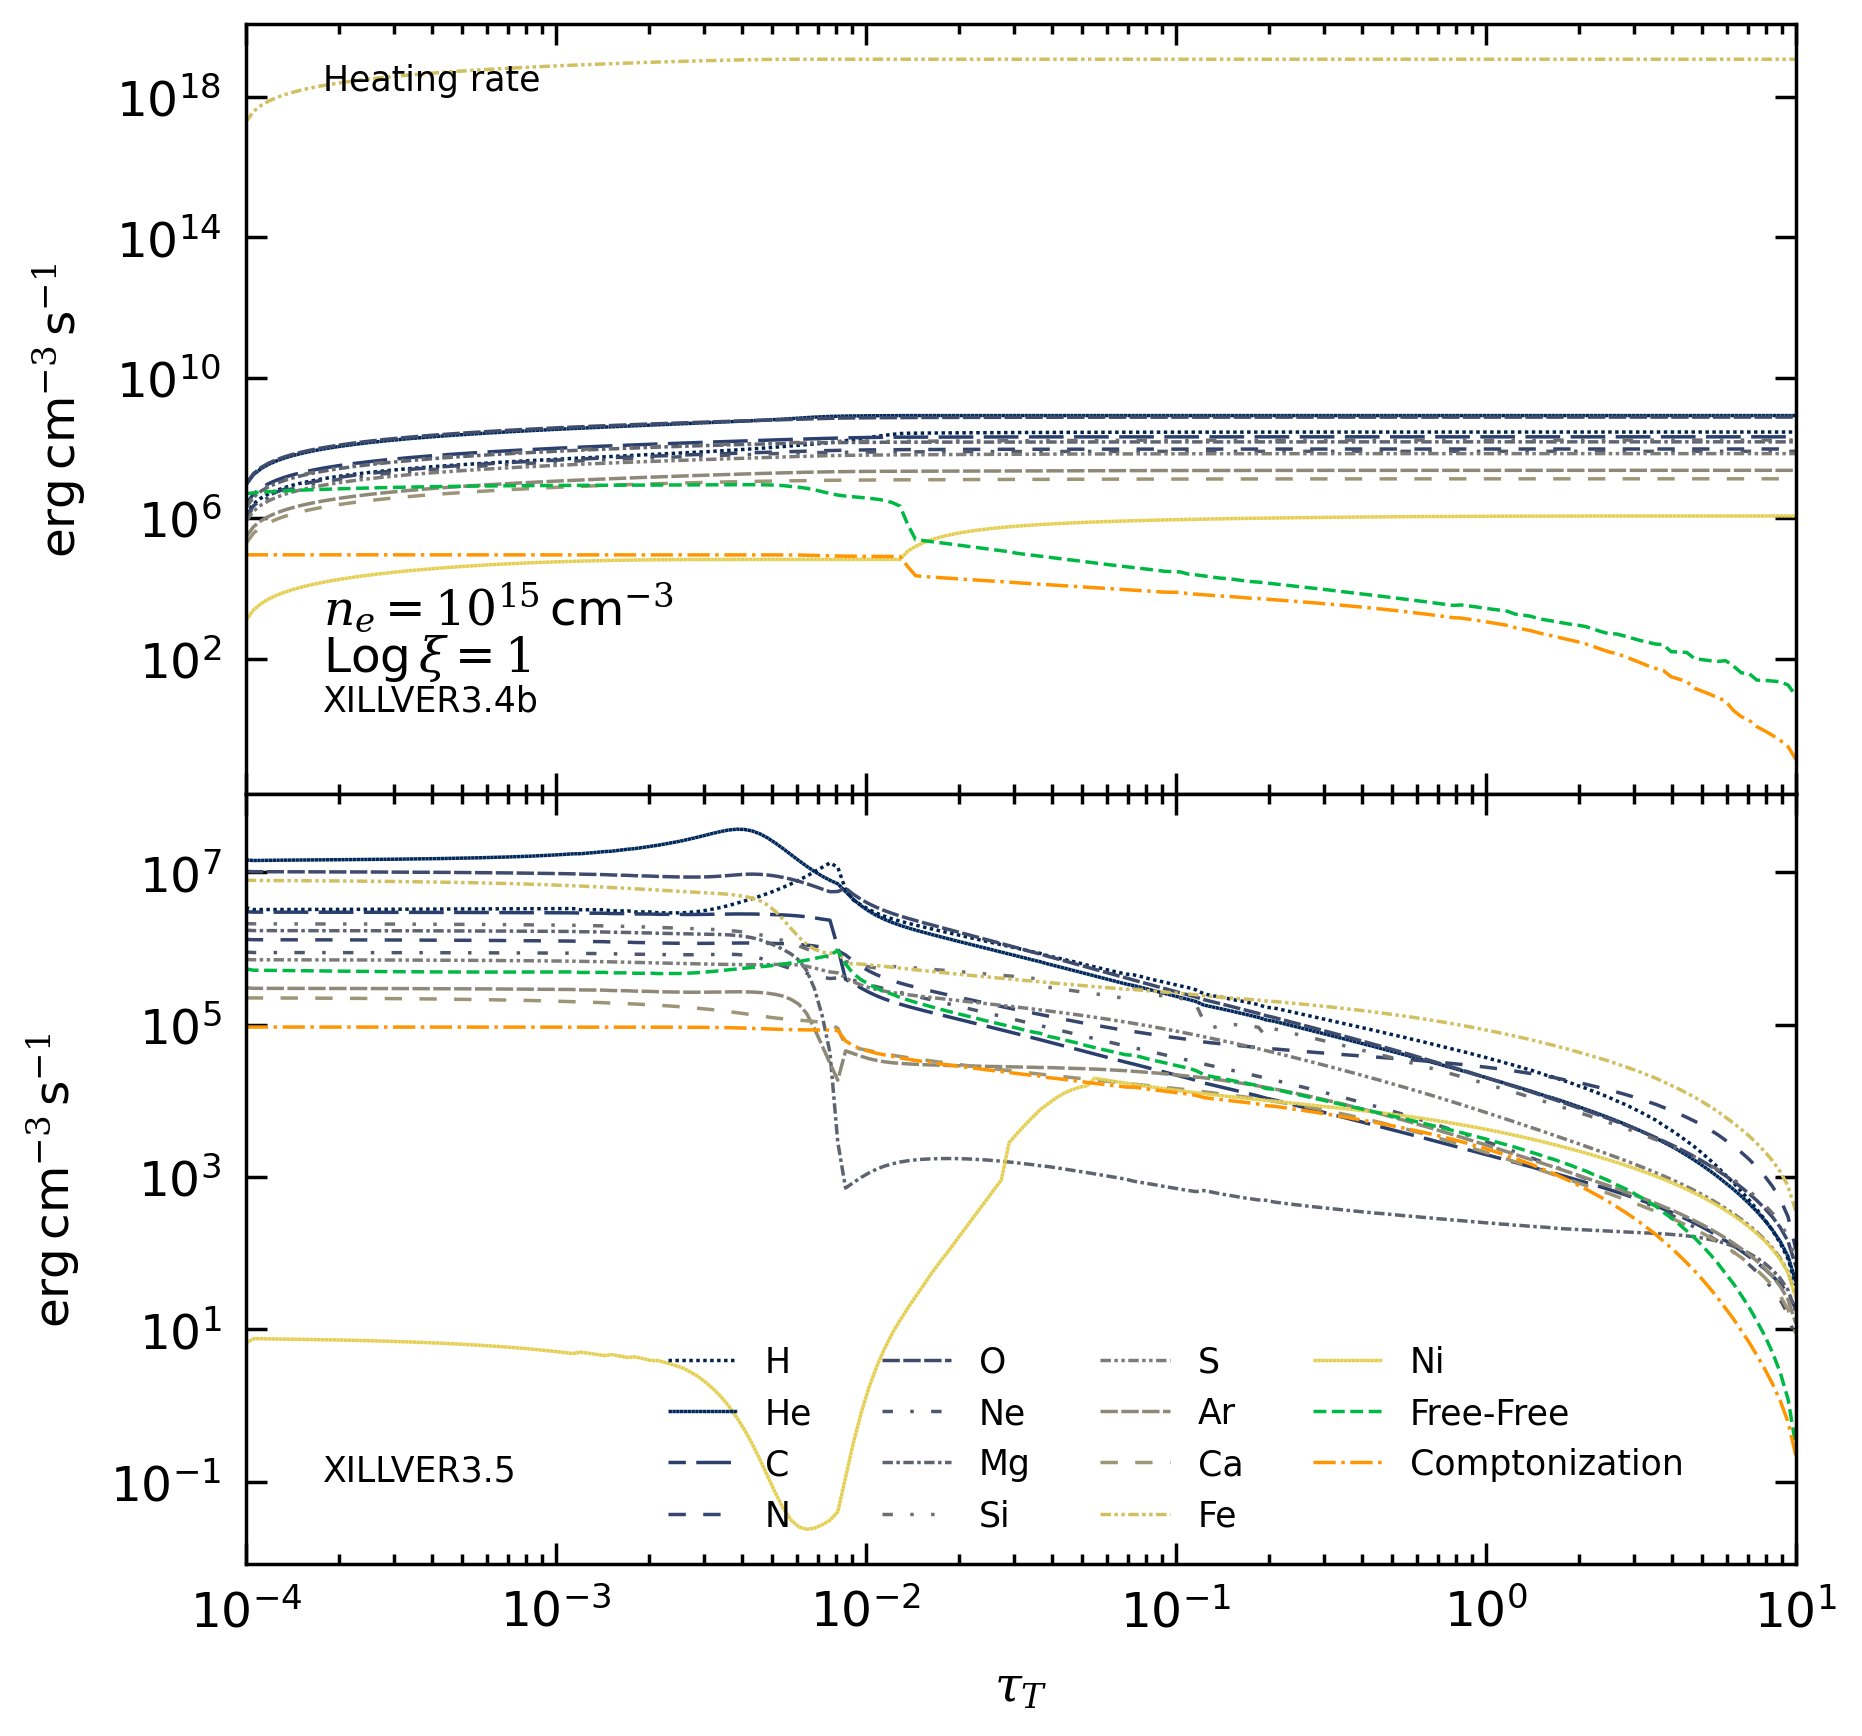

In [340]:
##Comparing heating for publication
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})

numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
lw=0.5
sm = plt.cm.ScalarMappable(cmap=cmap)
ionselect=elements
nion=len(ionselect)
gion=[]
colors=matplotlib.cm.cividis(np.arange(nion)/nion)

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),
     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
ls=[(0, (1, 1)),(0, (1, 0.1)),(5, (10, 3)),(0, (5, 5)),(0, (5, 1)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)),\
   (0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1)),(0, (5, 1)),(0, (5, 5))\
    ,(0, (3, 1, 1, 1, 1, 1)),(0, (1, 0.1)),(0, (5, 5))]

#ls=[lst[1] for lst in linestyle_tuple]
#,linestyle=ls[len(gion)]
for eind,e in enumerate(ionselect):
    #print(e)
    #print(spect[layer-1][e])
    
    y1=np.array([data[e] for data in heatosum])
    y2=np.array([data[e] for data in heat])
    
    if np.any(y1>10):
        pnum=len(axdict1)
        axdict1[e]=axs[0].plot(depth1,y1,color=colors[eind],lw=lw,ls=ls[pnum])
        gion.append(e)
    if np.any(y2>10):
        axdict2[e]=axs[1].plot(depth2,y2,color=colors[eind],lw=lw,ls=ls[pnum])

#Adding f-f and Comptonization etc.
mech='Free-Free'
axdict1[mech]=axs[0].plot(depth1,htfreef1,'--C1',lw=lw)
axdict2[mech]=axs[1].plot(depth2,htfreef2,'--C1',lw=lw)
gion.append(mech)
mech='Comptonization'
axdict1[mech]=axs[0].plot(depth1,htcomp1,'-.C2',lw=lw)
axdict2[mech]=axs[1].plot(depth2,htcomp2,'-.C2',lw=lw)
gion.append(mech)

#axs[0].plot(depth1,htlines1,'-.C2',lw=lw)
#axins1 = inset_axes(axs[1],
#                    width="60%",  # width = 50% of parent_bbox width
#                    height="5%",  # height : 5%
#                    loc='lower left',
#                    bbox_to_anchor=(0.2,0.13,1,1),
#                    bbox_transform=axs[1].transAxes)
#cbar=plt.colorbar(sm, ticks=np.linspace(0,1,2),orientation="horizontal",cax=axins1)
#cbar.set_label(label=r"Z", labelpad=-1)
#cbar.ax.set_xticklabels(['0','%d'%nion])
axs[0].text(0.05, 0.95,"Heating rate",transform=axs[0].transAxes\
            ,verticalalignment='top',horizontalalignment='left',fontsize=5)
axs[0].text(0.05,0.22,r"$n_{e}=10^{%d}\,$cm$^{-3}$"%density,transform=axs[0].transAxes)
axs[0].text(0.05,0.16,r"Log$\,\xi=%d $"%logxi,transform=axs[0].transAxes)

axs[0].text(0.05, 0.1,"XILLVER3.4b",transform=axs[0].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"XILLVER3.5",transform=axs[1].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#axs[0].set_ylim([1e-13,1])
#axs[1].set_ylim([1e-13,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"$\tau_{T}$")
axs[0].set_ylabel(r"erg$\,$cm$^{-3}\,$s$^{-1}$")
axs[1].set_ylabel(r"erg$\,$cm$^{-3}\,$s$^{-1}$")
axs[1].legend([axdict1[e] for e in gion],ncols=4,labels=gion,fontsize=5,\
              loc='lower center',bbox_to_anchor=(0.6,0))
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
fig.savefig("./pub/heatingrates_{}.pdf".format(datype))
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

/tmp/ipykernel_3416473/2812747092.py:74: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axs[0].legend([axdict1[e] for e in gion],ncols=4,labels=gion,fontsize=5\


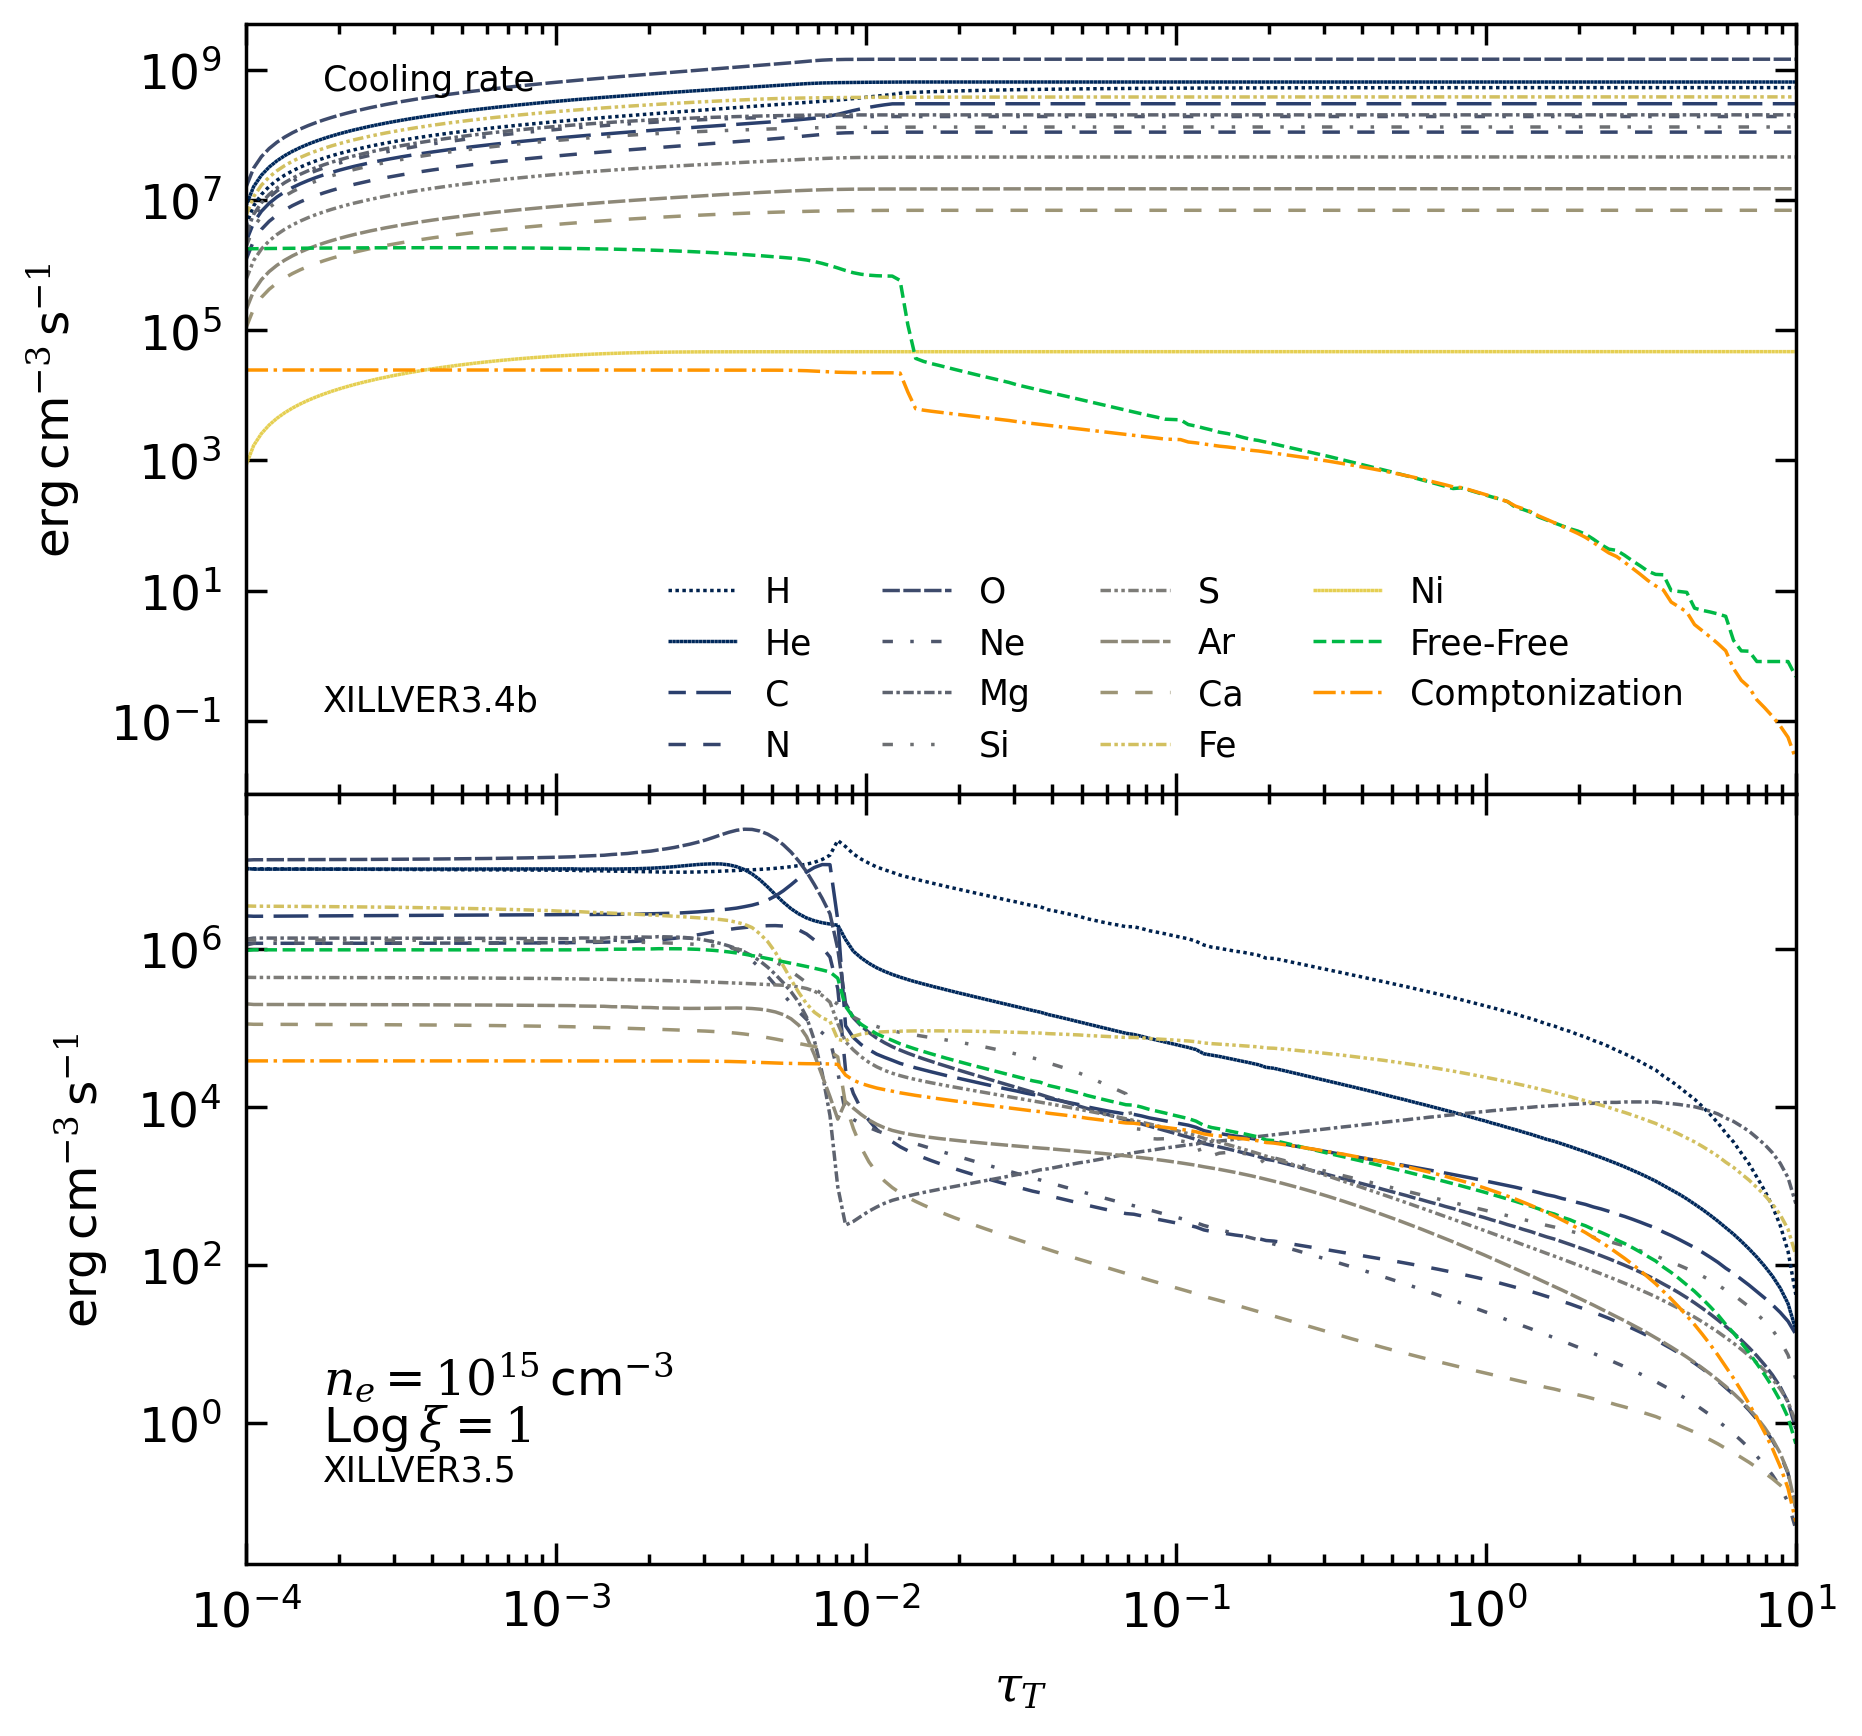

In [341]:
##Comparing cooling profile for publication
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})
lw=0.5
numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
ms=0.5
sm = plt.cm.ScalarMappable(cmap=cmap)
ionselect=elements
nion=len(ionselect)
gion=[]
colors=matplotlib.cm.cividis(np.arange(nion)/nion)
ls=[(0, (1, 1)),(0, (1, 0.1)),(5, (10, 3)),(0, (5, 5)),(0, (5, 1)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)),\
   (0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1)),(0, (5, 1)),(0, (5, 5))\
    ,(0, (3, 1, 1, 1, 1, 1)),(0, (1, 0.1)),(0, (5, 5))]

for eind,e in enumerate(ionselect):
    #print(e)
    #print(spect[layer-1][e])
    
    y1=np.array([data[e] for data in coolo])
    y2=np.array([data[e] for data in cool])
    if np.any(y1>10):
        pnum=len(axdict1)
        axdict1[e]=axs[0].plot(depth1,y1,color=colors[eind],lw=lw,ls=ls[pnum])
        gion.append(e)
    if np.any(y2>10):
        axdict2[e]=axs[1].plot(depth2,y2,color=colors[eind],lw=lw,ls=ls[pnum])
        
#Adding f-f and Comptonization etc.
mech='Free-Free'
axdict1[mech]=axs[0].plot(depth1,clfreef1,'--C1',lw=lw)
axdict2[mech]=axs[1].plot(depth2,clfreef2,'--C1',lw=lw)
gion.append(mech)
#mech='Recombination'
#axdict1[mech]=axs[0].plot(depth1,clrec1,'--C3',lw=lw)
#gion.append(mech)
#mech='Line Cooling'
#axdict1[mech]=axs[0].plot(depth1,cllines1,'-.C4',lw=lw)
#gion.append(mech)
mech='Comptonization'
axdict1[mech]=axs[0].plot(depth1,clcomp1,'-.C2',lw=lw)
axdict2[mech]=axs[1].plot(depth2,clcomp2,'-.C2',lw=lw)
gion.append(mech)
axs[0].text(0.05, 0.95,"Cooling rate",transform=axs[0].transAxes\
            ,verticalalignment='top',horizontalalignment='left',fontsize=5)
axs[1].text(0.05,0.22,r"$n_{e}=10^{%d}\,$cm$^{-3}$"%density,transform=axs[1].transAxes)
axs[1].text(0.05,0.16,r"Log$\,\xi=%d $"%logxi,transform=axs[1].transAxes)
axs[0].text(0.05, 0.1,"XILLVER3.4b",transform=axs[0].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"XILLVER3.5",transform=axs[1].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#axs[0].set_ylim([1e-13,1])
#axs[1].set_ylim([1e-13,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"$\tau_{T}$")
axs[0].set_ylabel(r"erg$\,$cm$^{-3}\,$s$^{-1}$")
axs[1].set_ylabel(r"erg$\,$cm$^{-3}\,$s$^{-1}$")
axs[0].legend([axdict1[e] for e in gion],ncols=4,labels=gion,fontsize=5\
              ,loc='lower center',bbox_to_anchor=(0.6,0))
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
fig.savefig("./pub/coolingrates_{}.pdf".format(datype))
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

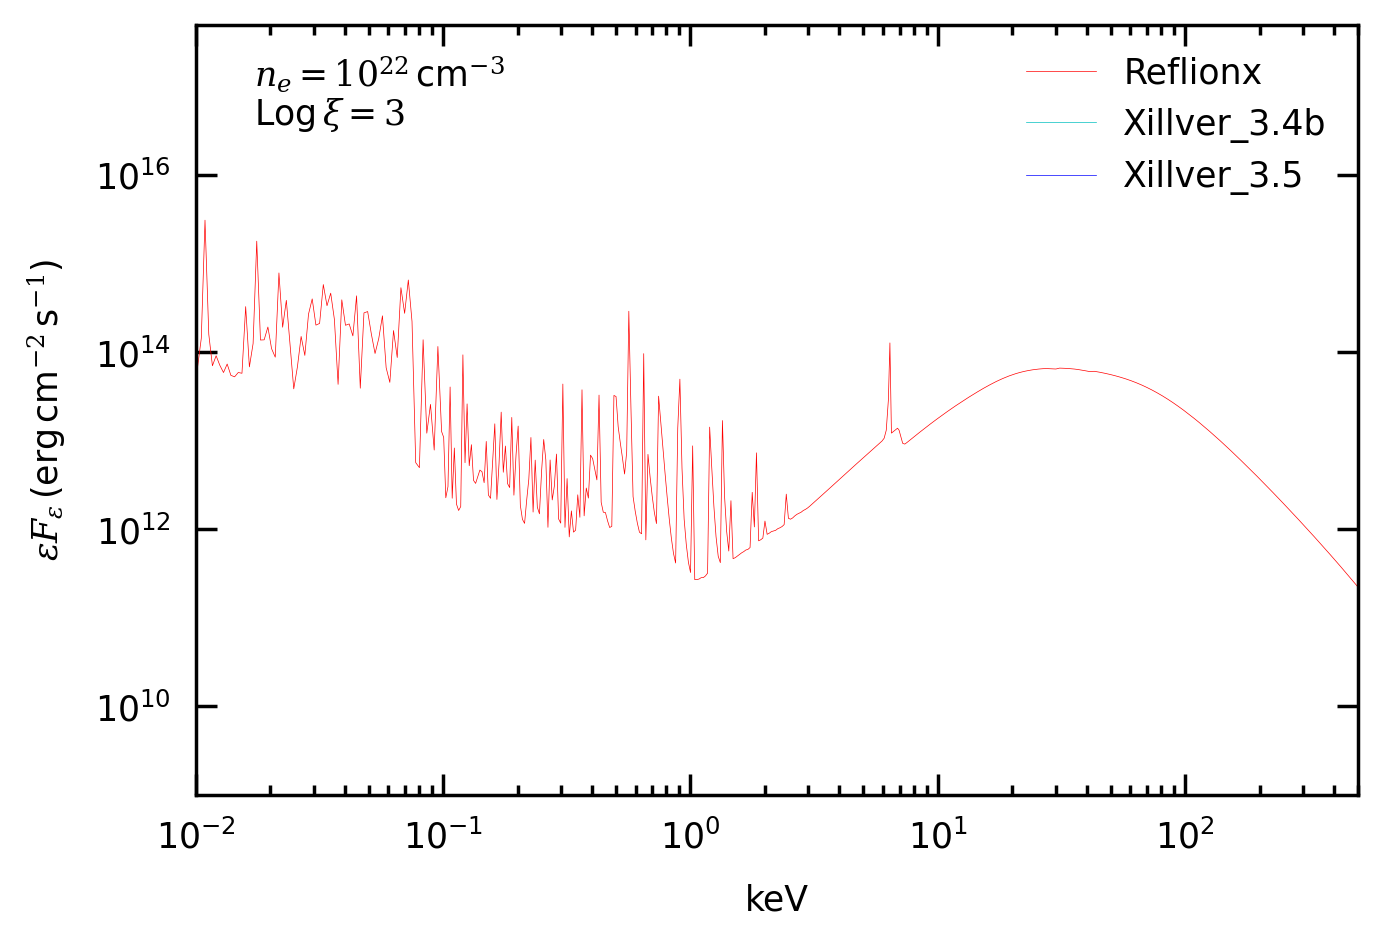

In [303]:
#Ploting spectra for publication
import matplotlib.pyplot as plt
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})

lw=0.1
numrow=1
numcol=1

fig=plt.figure(figsize=(3*numcol,2*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)

fac=1.6e11

#Setting negative fluxes to zero
find=foutE2<0
foutE2[find]=0.


axs.plot(rxinput[0],fac*rxinput[3],"r",label="Reflionx",lw=lw)
#axs.plot(rxinput[0],fac*rxinput[2],"r-.")

axs.plot(specE1/1e3,foutE1*eV*specE1,"c",label="Xillver_3.4b",lw=lw)
#axs.plot(specE1/1e3,fionizE1*eV*specE1,"c-.",ms=0.5)

axs.plot(specE2/1e3,foutE2*eV*specE2,"b",ms=0.5,label="Xillver_3.5",lw=lw)
#axs.plot(specE2/1e3,fionizE2*eV*specE2,"b-.",ms=0.5)


#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


axs.set_xscale("log")
axs.legend()
axs.set_yscale("log")
axs.set_xlabel("keV")
axs.set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)")
axs.set_xlim([1e-2,500])
axs.set_ylim([1e9,5e17])
#plt.axvline(x=)
#axs=plt.gca()
axs.text(0.05,0.92,r"$n_{e}=10^{%d}\,$cm$^{-3}$"%density,transform=axs.transAxes)
axs.text(0.05,0.87,r"Log$\,\xi=%d $"%logxi,transform=axs.transAxes)
plt.savefig("./pub/compRX"+datype+".pdf",dpi=300)

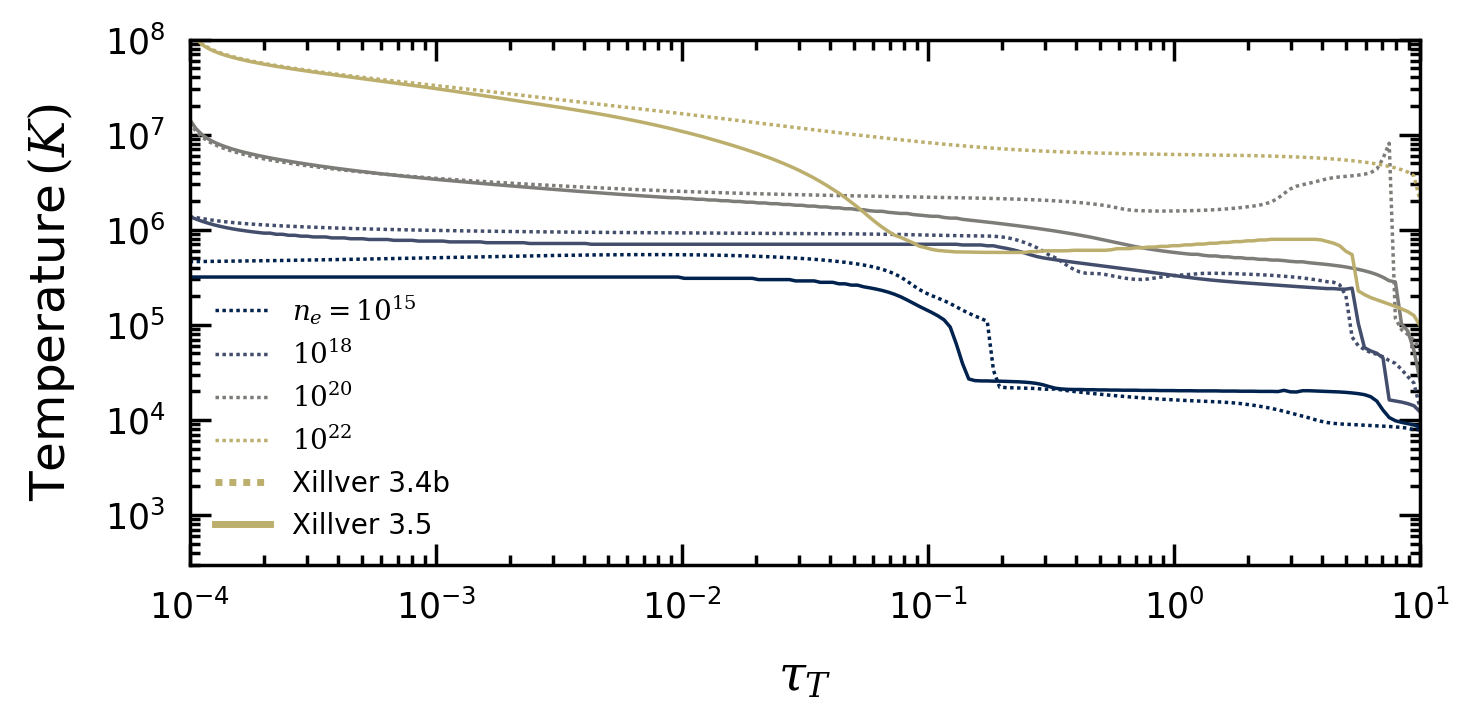

In [190]:
#Comparing different iterations
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from os.path import join
import scienceplots
from matplotlib.lines import Line2D
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})

darray=[15,18,20,22]
logxi=2

eV=1.602e-12
kb=1.3807e-16


numrow=1
numcol=1
lw=0.5
cmap = matplotlib.cm.get_cmap('cividis')
sm = plt.cm.ScalarMappable(cmap=cmap)
colors=matplotlib.cm.cividis(np.arange(len(darray))/len(darray))

fig=plt.figure(figsize=(3*numcol,1.5*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol,hspace=0)
axs=gs.subplots(sharex=True)
lines=[]

for dind,density in enumerate(darray):
    datype="n{}_logxi_{}".format(density,logxi)
    rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
    rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5/tbb1",datype)


    specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0)
    if len(specE1)>2*bN:
        ite=14
    else:
        ite=0

    depth1=np.loadtxt(join(rpatho,"current/temper"),usecols=0,max_rows=200,skiprows=0)
    tempeV1=np.loadtxt(join(rpatho,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
    temp1=tempeV1*eV/kb


    specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)
    if len(specE2)>2*bN:
        ite=14
    else:
        ite=0

    depth2=np.loadtxt(join(rpath,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
    tempeV2=np.loadtxt(join(rpath,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
    temp2=tempeV2*eV/kb
    if dind==0:
        line,=axs.plot(depth1,temp1,color=colors[dind],lw=lw,ls=(0, (1, 1)),label=r"$n_{e}=10^{%d}$"%density)
        axs.plot(depth2,temp2,color=colors[dind],lw=lw,ls='-')
    else:
        line,=axs.plot(depth1,temp1,color=colors[dind],lw=lw,ls=(0, (1, 1)),label=r"$10^{%d}$"%density)
        axs.plot(depth2,temp2,color=colors[dind],lw=lw,ls='-')
    lines.append(line)
    #axdict1[density]=lines1
    #axdict2[density]=lines2
proxy_line1 = Line2D([], [], linestyle=(0, (1, 1)), color=colors[dind], label="Xillver 3.4b")
proxy_line2 = Line2D([], [], linestyle='-', color=colors[dind], label="Xillver 3.5")
lines.append(proxy_line1)
lines.append(proxy_line2)
labels=[l.get_label() for l in lines]
#labels=[axdict1[density].get_label() for density in darray]
#labels[0]=r"Xillver$\,$3.4b$\,$"+labels[0]

#axs.legend([axdict1[density] for density in darray],ncols=4,labels=labels\
#              ,loc='best')
axs.legend(lines,labels,ncols=1,loc='lower left',fontsize=4)
#axs[0].legend(fontsize=2)
#axs[1].legend(fontsize=2)
#axs[0].set_title("Spectrum")
#axs[1].set_title("Temperature profile")
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlim([1e-4,10])
axs.set_xlabel(r"$\tau_{T}$",fontsize=7)
axs.set_ylabel("Temperature$\,(K)$",fontsize=7)

#axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#axs[0].set_xlim([1e-4,10])
axs.set_ylim([3e2,1e8])
#axs[0].set_xlabel(r"$\tau_{T}$")
#axs[0].set_ylabel("Temperature$\,(K)$")
fig.tight_layout()
fig.savefig("./pub/temp_profile_logxi_{}.pdf".format(logxi))

In [176]:
print(labels)

['$n_{e}=10^{15}$', '$10^{18}$', '$10^{20}$', '$10^{22}$', 'Xillver 3.4b', 'Xillver 3.5']
